# Basic Image Classification: Fashion MNIST

Esentially, image classification is the process of using a machine learning algorithm to sort images into different groups or segments. 

Sangaiah (2019) does an excellent job of providing a more technical decription of the task ahead. 

"Image processing is an improved example for digitizing a scene and performing some operations, or a method for extracting useful information from it. Image classification is a very wide area of image processing. 

*Classification is the process of ensuring that unclassified images are included in their class within certain categories*. Image classification is a problem of computer vision that deals with a lot of basic information from fields such as healthcare, agriculture, meteorology and safety. 

The human brain can easily classify images. But for a computer this is not easy if the image contains noise. Different methods have been developed to perform the classification operation. 

General classification procedures can be divided into two broad categories of **supervised classification** based on the method used and **unsupervised classification**."

- Arun Kumar Sangaiah. (2019). Deep learning and parallel computing environment for bioengineering systems. St. Louis, Missouri Elsevier, Ap, Academic Press.



## Import the Data

### Fashion MNIST dataset


This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

This dataset is intended to be a direct replacement for the more traditional [MNIST](http://yann.lecun.com/exdb/mnist/) haand written character dataset. This dataset offerss both variety and added complexity over the traditional MNIST dataset. Furthermore, to aid in ease of learning, this datasset is available via TensorFlow and many other machine learning libraries, APIs and tools. 

The following block of code will import TensorFlow (the primary API used here) as well as other additional libraries to help with manipulation and visualization of data.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

One of the benefits of usisng a premade data set from Tensorflow is that they will already have the data split up and labelled for us. 

In this case we will actually be downloading four different NumPy arrays:



*   The `train_images` & `train_labels` arrays are used to train the model

*   The `test_images` & `test_labels` arrays are used to assess model performance


These arrays will be split into 60,000 and 10,000 entries for training and testing respectfully. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. 

The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

The following code block iss used to et the class names, and could be easily customized when using a new or custom image dataset.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data Exploration

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

This is important for us to check with our data. In this case, becausse the dataset is currated and cleaned, we can see that we have data for each of the 60k entries. Otherwise, we would need to begin data cleaning to resolve these issues.

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

Same as with the training data, it is important to check for missing data. Once again, our data is aligned and clean.

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

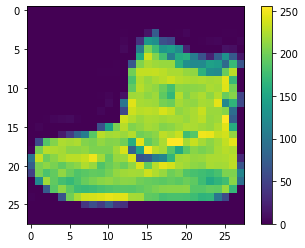

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

If you would like you can alsso explore other entries in the dataset by changing the "0" in the original code. Please see below for easy to follow instructions.

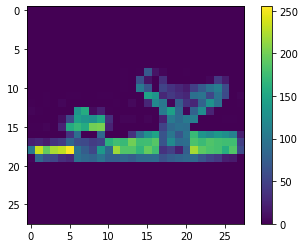

In [ ]:
# Ignore this
plt.figure()

# Change the value between "[]" to see different images.
# Make sure to use a value from 0 - 59,999
plt.imshow(train_images[59999])

#Ignore this
plt.colorbar()
plt.grid(False)
plt.show()

One of the goals we like to do with data in machine learning is creating more simple data for the algorithm to process. This type of feature engineering can range in complexity, but in our case, we just need to divide the values by 255. This will scale our data to all exist between 0 and 1, and can be done with other datasets in simular fashion. 

Also make sure that you complete the same preprocessing to both the training and testing datasets. Otherwise we will be comparing apples to oranges so to speak.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To check to see if the data is still correct, we can actually look at some of the images. In this case we will look at 50, but you can change this to better suit your needs.

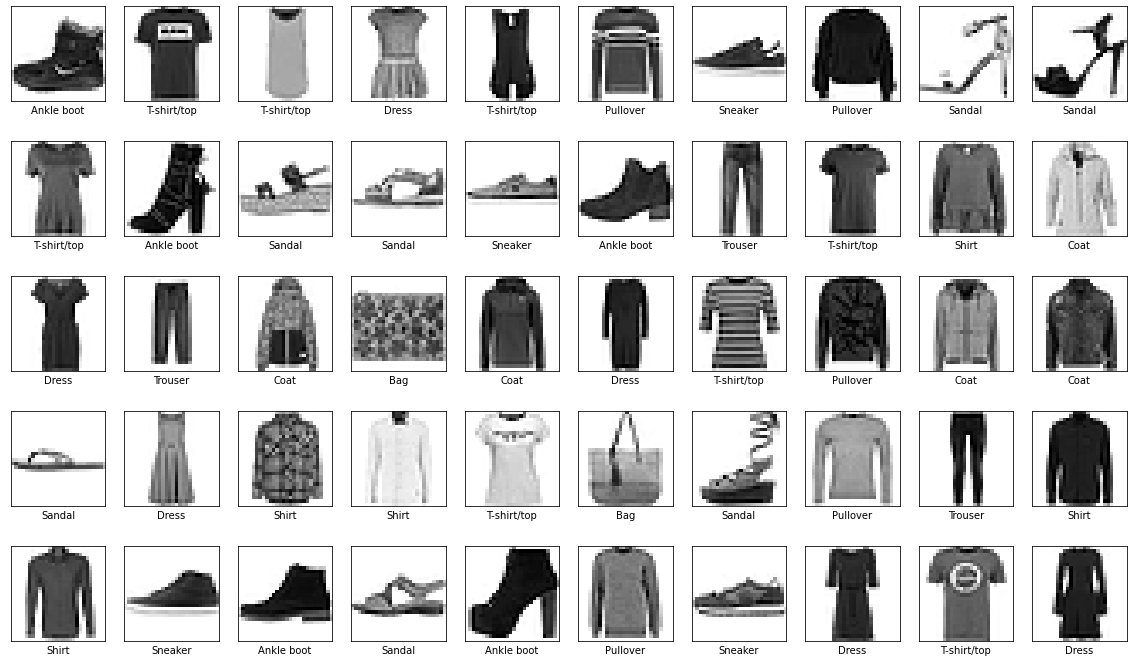

In [ ]:
plt.figure(figsize=(20,12))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

We are using TensorFlow to create a Neural Network (NN) to complete our classifications. NNs require aditional steps to many other more ssimple algorithmss, and that is layer building. 

## Set up the layers

The layers in a NN are similar to ingrediants in a sandwich, they need to be prepared before creating something delicious. With a sandwich you will need to decide the type of bread, crust or no crust, toasted or not toasted, etc., and the same can be said for a NN.

NN have an input layer and output layer (like the bread of a sandwich) with magic/delicious layer(s) are inbetween. 

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Flatten`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In many networks, inclduoing this one, the first layer is the `tf.keras.layers.Flatten`, which takes a 2D array and transforms it into a single dimensional array, (28 * 28 = 784). The primary role of this layer is to format the data, or flatten, for future layers

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). 

The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes. 

*This would be one of the parameters you would want to change if you are using a custom dataset.*


## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's **compile** step:

* **Loss Function** — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* **Optimizer** — This is how the model is updated based on the data it sees and its loss function. In this example we will use the **adam** optimizer
* **Metrics** — Used to monitor the training and testing steps. The following example uses *accuracy*.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model.
2. The model learns to associate images and labels.
3. Ask the model to make predictions about a test set—in.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

Please also note the number of epochs. This is the number of times the model will run through the data completely to train. There is a sweet spot between the amount of epochs and the accuracy of the model.

In fact, in some cases, overtraining a model will decrease the accuracy.

***Please feel free to experiment with different epochs below!***

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4991 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3735 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3112 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2799 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2476 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.239

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

Generally speaking, we are looking to have the highest accuracy with the lowet loss value.

Keep in mind, this is the accuracy on the training data, we need to evaluate our model on never before seen data.

# Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3461 - accuracy: 0.8779 - 524ms/epoch - 2ms/step

Test accuracy: 0.8779000043869019


In this example we see a small differene in the training accuracy of 91% and 88% with the test data. This 3% difference represents "overfitting" of the training data to the model. Or in other words, the model is too biased towards what is has seen prior, rather than new data. 

An example of this, while unlikely, but for the use of explanation. Imagine if all the t-shirts in the training data were crew neck, but then the testing data has t-shirts with v-neck designs. The model may missinterpet this v-neck as a dress, since that was a hypothetical key feature of dresses.

With that said, a 3% loss is not a big deal given the requirements of this project, and low quality images used for somewhat similar categories, e.g. sandals vs. sneakers. 

# Make predictions



With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs— **logits** —to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([2.6317382e-10, 6.8333506e-13, 2.4389357e-11, 1.1536525e-15,
       4.1735799e-11, 2.3674707e-04, 4.8228528e-09, 1.4526553e-02,
       1.1594650e-08, 9.8523670e-01], dtype=float32)

A prediction is an array of 10 numbers, in this case, since our final output layer was 10 nodes, which is also aligned with the number of categories we have in our dataset. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. 

<br>

You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. 

Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

This can be run on any number of images in the dataset, or even have a new one added in for prediction.

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 10th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

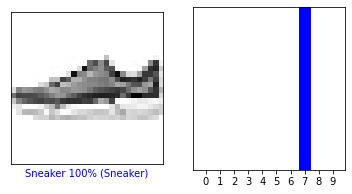

In [ ]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

This example is great, we see that it has predicted sneaker at 100% confidenmce, as we can ee from the single blue bar on the right and the callout at the bottom of the image. 

A better example of a prediction that is not so clear, we will look at the 13th entry in the test data.

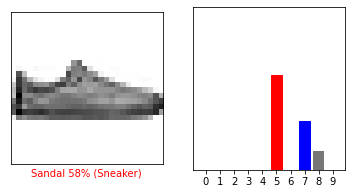

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

This image is clearly (at least to me a human) a ssneaker. However, the model predicted with 58% confidence that it was a sandal, then sneaker at around 30% confidence and 12% confidence that it was a bag. 

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

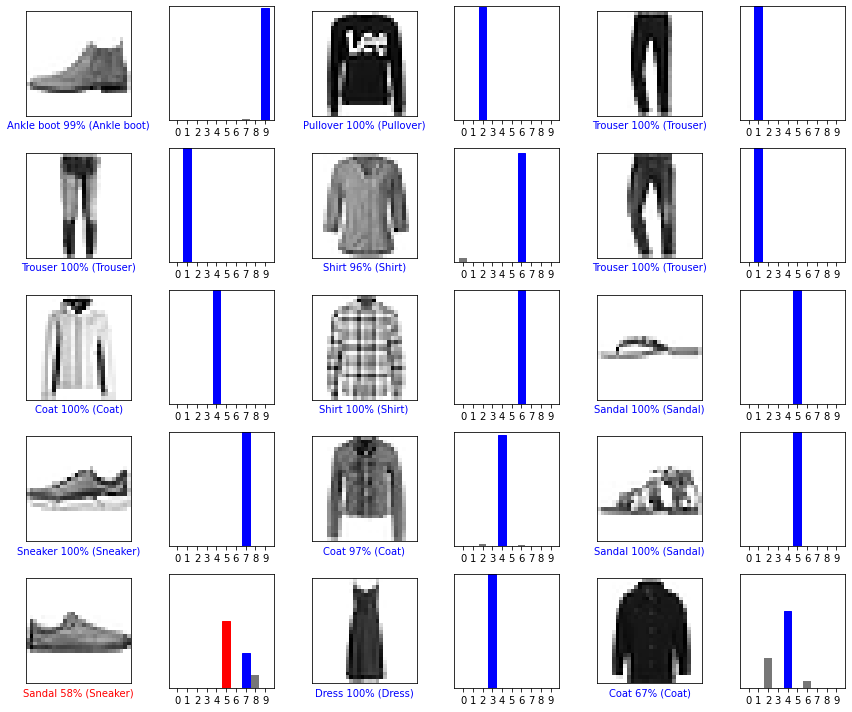

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

As we can see from above, most of the images had very high confidence levels in the predictions, except for the 13th (previously discussed) and the 15th. In the case of the 15th item, a coat, it only had a 67% confidence level in its prediction, but in this case, it was enough to be correct.

# Use the trained model

We can now use the model to make predictions, in this case we will test a single image, but the same process can be used for multiple images as demonstrated previously.

In this specific example we will use an image from the test dataset, but you could use any other similar greyscale, 28x28 image.

In [ ]:
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to run on multiple examples at once, and thusly we will need to treat our single image as if it was a collection. To do this, we add our image to a list.

In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


We can now pass the image into the model to get the prediction output.

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.73663191e-05 2.73075442e-12 9.95256960e-01 8.92526497e-10
  2.10750243e-03 5.20622989e-10 2.53806589e-03 2.68270670e-12
  1.17526454e-07 3.97315264e-10]]


Let's make this a little easier to undersstand for those of us who don't read scientific notation well!

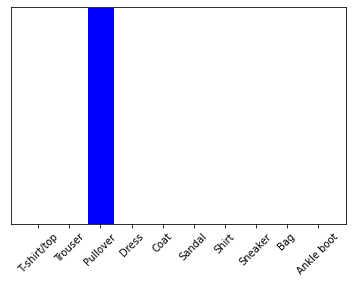

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

We can now check to see the actual label is:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicted the image correctly. 

# Now What?

I recommend trying the same model out on a different dataset. Please find below a list of different datasetss available on Kaggle:




*   [Gisette Dataset (MNIST digits 4 and 9)](https://www.kaggle.com/datasets/fedesoriano/gisette-dataset-mnist-digits-4-and-9)
*   [Nike, Adidas and Converse Shoes Images](https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged)



